<a href="https://colab.research.google.com/github/sakshisubedi/CSE_256_NLP/blob/main/naive_bayes/imdb_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/CSE_256_Project

/content/drive/MyDrive/CSE_256_Project


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("IMDB-Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df_train.head()

,review,sentiment
39087,That's what I kept asking myself during the ma...,0
30893,I did not watch the entire movie. I could not ...,0
45278,A touching love story reminiscent of In the M...,1
16398,This latter-day Fulci schlocker is a totally a...,0
13653,"First of all, I firmly believe that Norwegian ...",0


In [ ]:
df_test.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,1
9427,Not many television shows appeal to quite as m...,1
199,The film quickly gets to a major chase scene w...,0
12447,Jane Austen would definitely approve of this o...,1
39489,Expectations were somewhat high for me when I ...,0


In [ ]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_transform = vectorizer.fit_transform(df_train['review'])
X_test_transform = vectorizer.transform(df_test['review'])

In [ ]:
import time

# Start the timer
start_time = time.time()

In [ ]:
# build a Naive Bayes model
model = MultinomialNB()

In [ ]:
execution_time = time.time() - start_time
execution_time

0.020676374435424805

In [ ]:
# Train the model
model.fit(X_train_transform, df_train['sentiment'])

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_transform)

In [ ]:
accuracy = accuracy_score(df_test['sentiment'], y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8635


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test['sentiment'], y_pred)
confusion_mat

array([[4405,  556],
       [ 809, 4230]])

Text(0.5, 1.0, 'Confusion Matrix')

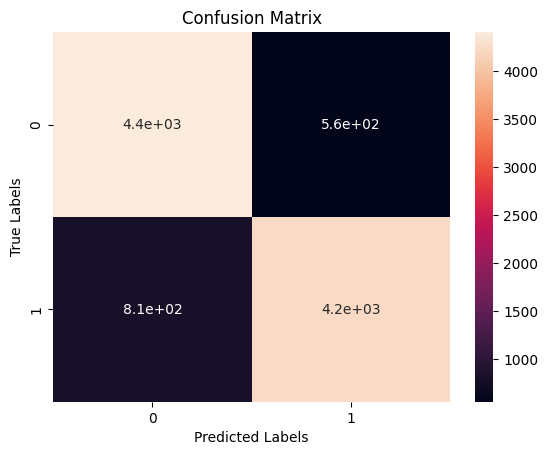

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

In [ ]:
# Calculate class-wise accuracy
import numpy as np
class_accuracy = np.diagonal(confusion_mat) / np.sum(confusion_mat, axis=1)
print("class-wise accuracy")
class_accuracy

class-wise accuracy


array([0.88792582, 0.83945227])

In [ ]:
# Identify misclassified instances
num_classes = len(confusion_mat)

misclassified_instances = []

for i in range(num_classes):
    for j in range(num_classes):
        if i != j and confusion_mat[i, j] > 0:
            misclassified_instances.append((i, j, confusion_mat[i, j]))
misclassified_instances

[(0, 1, 556), (1, 0, 809)]

In [ ]:
# printing misclassified data
wrong_predictions = 0
for idx, _ in enumerate(y_pred):
  if df_test.iloc[idx]['sentiment'] != y_pred[idx]:
    print(df_test.iloc[idx]['review'] + "\n\n")
    wrong_predictions += 1

Okay, I didn't get the Purgatory thing the first time I watched this episode. It seemed like something significant was going on that I couldn't put my finger on. This time those Costa Mesa fires on TV really caught my attention- and it helped that I was just writing an essay on Inferno! But let me see what HASN'T been discussed yet...<br /><br />A TWOP review mentioned that Tony had 7 flights of stairs to go down because of the broken elevator. Yeah, 7 is a significant number for lots of reasons, especially religious, but here's one more for ya. On a hunch I consulted wikipedia, and guess what Dante divided into 7 levels? Purgatorio. Excluding ante-Purgatory and Paradise. (The stuff at the bottom of the stairs and... what Tony can't get to.) <br /><br />On to the allegedly "random" monk-slap scene. As soon as the monks appeared, it fit perfectly in place with Tony trying to get out of Purgatory. You can tell he got worried when that Christian commercial (death, disease, and sin) came o

In [ ]:
# printing wrong predictions
wrong_predictions

1365

In [ ]:
# common misclassification
common_misclassifications = sorted(misclassified_instances, key=lambda x: x[2], reverse=True)
common_misclassifications

[(1, 0, 809), (0, 1, 556)]

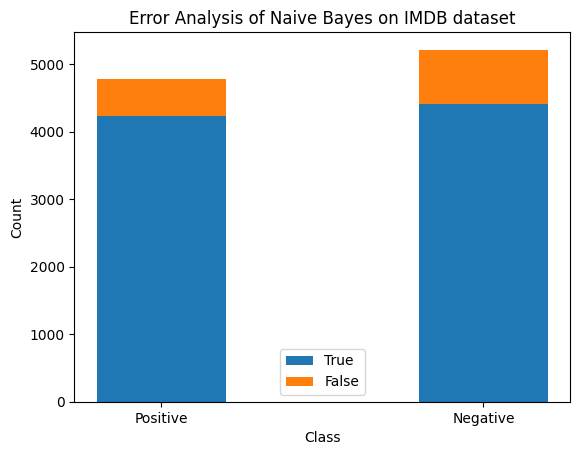

In [ ]:
true_positives = confusion_mat[1, 1]
true_negatives = confusion_mat[0, 0]
false_positives = confusion_mat[0, 1]
false_negatives = confusion_mat[1, 0]

# Set the labels for x-axis
labels = ['Positive', 'Negative']

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x, [true_positives, true_negatives], width, label='True')
rects2 = ax.bar(x, [false_positives, false_negatives], width, label='False', bottom=[true_positives, true_negatives])

# Set plot title, legend, and axis labels
ax.set_title('Error Analysis of Naive Bayes on IMDB dataset')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()